In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob, os, shutil
from skimage.feature import peak_local_max
from scipy.signal import find_peaks, peak_widths
from scipy.signal import savgol_filter
from scipy.integrate import simpson
from numpy import trapz

In [2]:
df = pd.read_csv('k.csv')

In [3]:
def reconstruct_array(row, column_name):
    array_flat = np.fromstring(row[column_name], sep=',')
    return array_flat

In [4]:
for col in ['N1', 'N2', 'N3']:
    df[col] = df.apply(reconstruct_array, axis=1, column_name=col)

In [5]:
for i in range(len(df)):
    df.N1[i] = df.N1[i].reshape((70, 270))
    df.N2[i] = df.N2[i].reshape((70, 270))
    df.N3[i] = df.N3[i].reshape((70, 270))

In [6]:
for i in range(len(df)):
    df.N1[i] = df.N1[i][5:65, 10:260]
    df.N2[i] = df.N2[i][5:65, 10:260]
    df.N3[i] = df.N3[i][5:65, 10:260]

In [7]:
def peak(img):
    bw_smooth = savgol_filter(np.mean(img, axis=0), 5, 2)
    peaks, _ = find_peaks(bw_smooth, distance=100)
    return bw_smooth[peaks[0]], peaks[1]-peaks[0], bw_smooth, peaks

In [8]:
a, b, c, d = peak(df.N3[5])

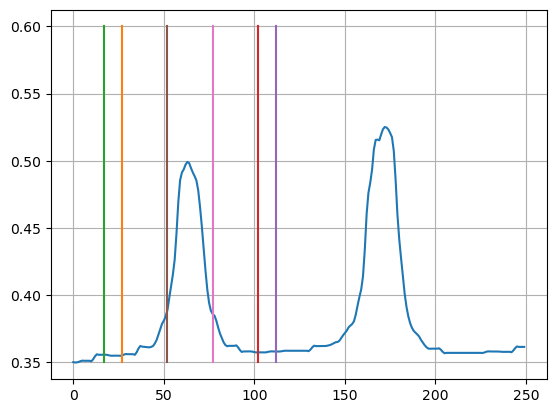

In [9]:
plt.plot(c)
plt.plot([d[1] - (110+35), d[1] - (110+35)], [.35, .6])
plt.plot([d[1] - (110+45), d[1] - (110+45)], [.35, .6])
plt.plot([d[1] - [(110/2) + 15], d[1] - [(110/2) + 15]], [.35, .6])
plt.plot([d[1] - [(110/2) + 5], d[1] - [(110/2) + 5]], [.35, .6])
plt.plot([d[1] - 120, d[1] - 120], [.35, .6])
plt.plot([d[1] - 95, d[1] - 95], [.35, .6])
plt.grid()

In [10]:
N1_SBR, N2_SBR, N3_SBR = [], [], []

for i in range(len(df)):
    a, b, c, d = peak(df.N1[i])
    base_l = np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])
    base_r = np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])
    SBR_test_line = np.amax(c[d[1] - 120:d[1] - 95])/np.average([base_l, base_r])
    N1_SBR.append(SBR_test_line)
    
for i in range(len(df)):    
    a, b, c, d = peak(df.N2[i])
    base_l = np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])
    base_r = np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])
    SBR_test_line = np.amax(c[d[1] - 120:d[1] - 95])/np.average([base_l, base_r])
    N2_SBR.append(SBR_test_line)
    
for i in range(len(df)):    
    a, b, c, d = peak(df.N3[i])
    base_l = np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])
    base_r = np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])
    SBR_test_line = np.amax(c[d[1] - 120:d[1] - 95])/np.average([base_l, base_r])
    N3_SBR.append(SBR_test_line)
    

In [11]:
positivity_threshold = np.average([N1_SBR[0], N2_SBR[0], N3_SBR[0]]) + 3*np.std([N1_SBR[0], N2_SBR[0], N3_SBR[0]])
positivity_threshold

1.01474143986223

In [12]:
df_K = pd.DataFrame()

In [13]:
df_K['N1'] = N1_SBR
df_K['N2'] = N2_SBR
df_K['N3'] = N3_SBR

In [14]:
df_K

,N1,N2,N3
0,1.009805,1.008222,1.012053
1,1.024677,1.041109,1.044224
2,1.036835,1.124618,1.050789
3,1.063234,1.121734,1.176720
4,1.178049,1.248832,1.194436
5,1.339000,1.351296,1.400405
6,1.412987,1.417616,1.438053
7,1.421313,1.387241,1.430754


In [15]:
df_K.to_csv('SBR_K.csv', index=False)